In [37]:
import pandas as pd

In [38]:
# manually given price of treadmills in dollars
price_treadmill = {'KP281': 1500, 'KP481': 1750, 'KP781': 2500}

In [39]:
#https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [40]:
#df['Price'] = df.apply(lambda x: price_treadmill[x.Product], axis=1)

In [41]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### Statistical Summary

In [42]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [44]:
print(df['Product'].unique())
print(df['Gender'].unique())
print(df['MaritalStatus'].unique())

['KP281' 'KP481' 'KP781']
['Male' 'Female']
['Single' 'Partnered']


## Data shape and Attribute types

- Here the analysis goes on to identify the target audience for 3 types of Treadmills
- Total number of Records are 180 with attributes (Age, Gender, Education, Marital Status, Usage, Fitness, Income, Miles)
- There is no missing value in whole dataset
- Attribute types
  - Age in years : integer, 
  - Education in years : integer,
  - Usage in expected usage number of times per week : integer, 
  - fitness in self-rating of 1 to 5 : integer, 
  - income in annual income in dollars : integer, 
  - miles in expected avg miles per week by customer : integer
  - price in dollars : integer
- Gender, MaritalStatus are categorical variables: string

## Range of Attributes

- Gender, MaritalStatus, Price are categorical variables
- Range of Customers Age is 18 - 50 years
- Range of Customers Education is 12 - 21 years
- Range of Usage of Treadmills is 2 - 7 times per week
- Range of Customers Fitness rating is 1 - 5
- Range of Customers Income is 29562 - 104581 $ per annum
- Range of avg miles per week is 21 - 360

### Categorical Conversion

In [45]:
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


## Univariate analysis

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

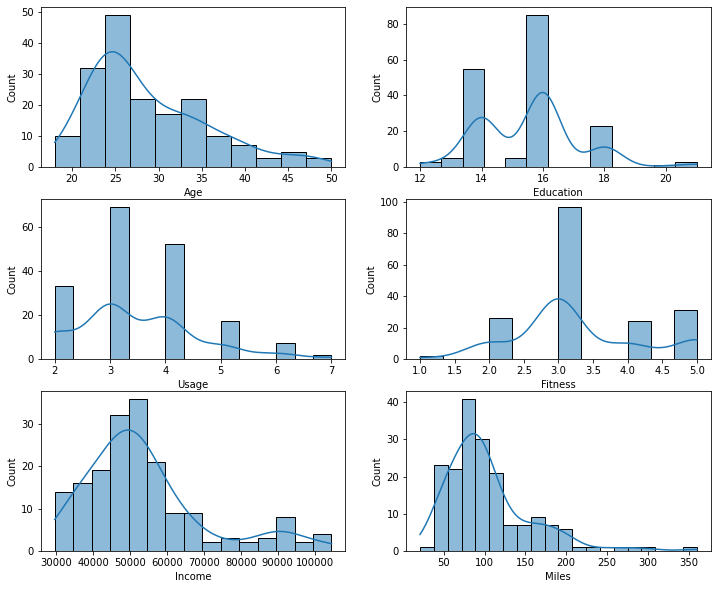

In [47]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

sns.histplot(data=df, x="Age", kde=True, ax=ax[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=ax[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=ax[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=ax[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=ax[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=ax[2,1])
plt.show()

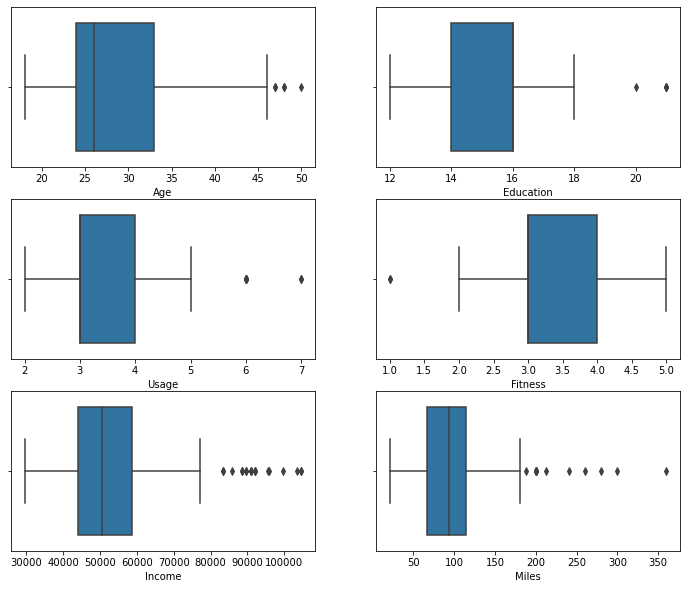

In [48]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

sns.boxplot(data=df, x="Age", orient='h', ax=ax[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=ax[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=ax[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=ax[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=ax[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=ax[2,1])
plt.show()

- Observations 
    - Maily Outliers are there in Income and Miles
    - Agewise data is mainly distributed between 21 and 35 both inclusive
    - Approx 78% customers are having education of 14 and 16 years
    - More than 80% customers expect to use it 2 to 4 times a week.

### Value Counts on Categorical Attributes

In [49]:
#assuming fitness to be a categorical
for i in ['Product', 'Gender', 'MaritalStatus', 'Fitness']:
    print(df[i].value_counts())

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
Male      104
Female     76
Name: Gender, dtype: int64
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64


### Categorical attributes visual analysis

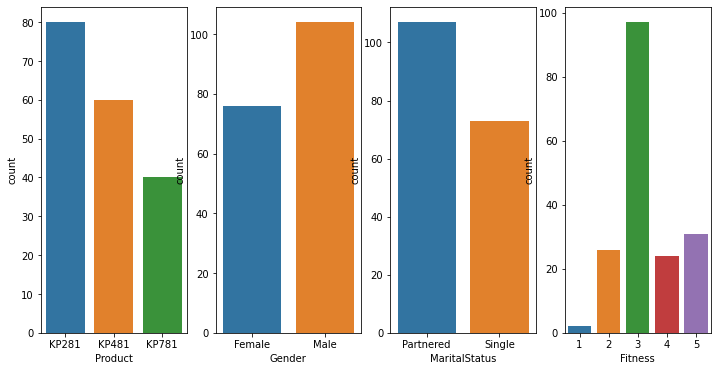

In [50]:
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))
sns.countplot(data=df, x='Product', ax=ax[0])
sns.countplot(data=df, x='Gender', ax=ax[1])
sns.countplot(data=df, x='MaritalStatus', ax=ax[2])
sns.countplot(data=df, x='Fitness', ax=ax[3])


plt.show()

- Observations
    - KP281 is used by most people as this is cheaper from other twos, that might be the main reason
    - Count of male customers is 104 while female count is 76
    - 107 customers out of 180 who bought treadmills are having partner
    - Most customers rate themselves as medium fitness (rated 3)

In [51]:
#df[['Product', 'Gender', 'MaritalStatus']].melt()

## Bivariate Analysis

### Product vs Attributes

In [52]:
cols = ['Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness']
for i in cols:
    print('\033[1m'+'----------------------Product vs '+ i + '----------------------'+'\033[0m')
    print(pd.crosstab(df[i], df['Product'], margins=True))
#     print('*********************************************************')

----------------------Product vs Age----------------------
Product  KP281  KP481  KP781  All
Age                              
18           1      0      0    1
19           3      1      0    4
20           2      3      0    5
21           4      3      0    7
22           4      0      3    7
23           8      7      3   18
24           5      3      4   12
25           7     11      7   25
26           7      3      2   12
27           3      1      3    7
28           6      0      3    9
29           3      1      2    6
30           2      2      3    7
31           2      3      1    6
32           2      2      0    4
33           2      5      1    8
34           2      3      1    6
35           3      4      1    8
36           1      0      0    1
37           1      1      0    2
38           4      2      1    7
39           1      0      0    1
40           1      3      1    5
41           1      0      0    1
42           0      0      1    1
43           1      0  

In [53]:
cols = ['Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness']
for i in cols:
    print('\033[1m'+'----------------------Product vs '+ i + '----------------------'+'\033[0m')
    print(pd.crosstab(df[i], df['Product'], margins=True, normalize=True))
#     print('*********************************************************')

----------------------Product vs Age----------------------
Product     KP281     KP481     KP781       All
Age                                            
18       0.005556  0.000000  0.000000  0.005556
19       0.016667  0.005556  0.000000  0.022222
20       0.011111  0.016667  0.000000  0.027778
21       0.022222  0.016667  0.000000  0.038889
22       0.022222  0.000000  0.016667  0.038889
23       0.044444  0.038889  0.016667  0.100000
24       0.027778  0.016667  0.022222  0.066667
25       0.038889  0.061111  0.038889  0.138889
26       0.038889  0.016667  0.011111  0.066667
27       0.016667  0.005556  0.016667  0.038889
28       0.033333  0.000000  0.016667  0.050000
29       0.016667  0.005556  0.011111  0.033333
30       0.011111  0.011111  0.016667  0.038889
31       0.011111  0.016667  0.005556  0.033333
32       0.011111  0.011111  0.000000  0.022222
33       0.011111  0.027778  0.005556  0.044444
34       0.011111  0.016667  0.005556  0.033333
35       0.016667  0.022222  

### Bivariate Visual Analysis

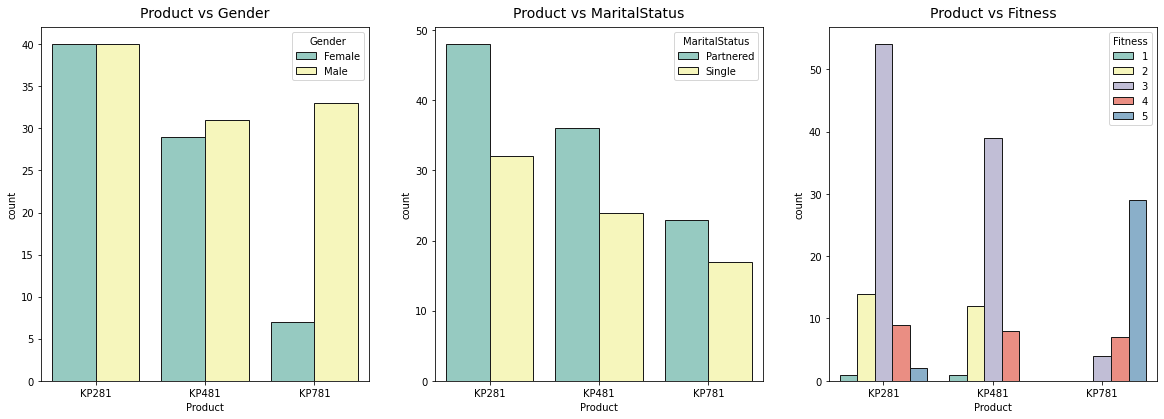

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6.5))
sns.countplot(data=df, x='Product', hue='Gender', palette="Set3", edgecolor="0.1", ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', palette="Set3", edgecolor="0.1", ax=axs[1])
sns.countplot(data=df, x='Product', hue='Fitness', palette="Set3", edgecolor="0.1", ax=axs[2])

axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
axs[2].set_title("Product vs Fitness", pad=10, fontsize=14)
plt.show()

- Observations
    - KP281 is preferred by equally by male and female while as we move towards high priced treadmills this gap becomes much wider
    - Treadmills are peferred by partnered customers more compared to single ones
    - People with medium fitness prefers to buy low range trademills and those with high fitness prefers to buy KP781 (Expensive)

### Relationship between attributes

In [55]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


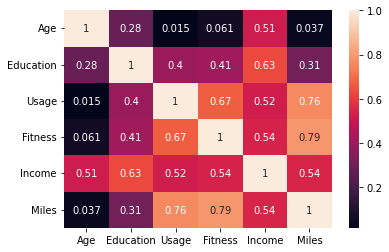

In [56]:
sns.heatmap (data = df.corr() , annot = True)
plt.show()

- Observations
    - It looks these (Usage and miles and Fitness), (Income and Education) are positively correlated which makes sense
    - And (Usage, miles, Fitness) are negatively correlated with Age which also makes sense

## Marginal and Conditional Probabilities

In [84]:
#Marginal
print(df['Product'].value_counts(normalize=True))
print(df['Gender'].value_counts(normalize=True))
print(df['MaritalStatus'].value_counts(normalize=True))

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64
Male      0.577778
Female    0.422222
Name: Gender, dtype: float64
Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64


In [96]:
#Conditional
#Given Gender Probalility of the products
for j in df['Gender'].unique():
    for i in df['Product'].unique():
        print('Probability of product being {} given that Gender is {}, is:'.format(i, j), end=' ')
        print(round(len(df[(df['Product'] == i) & (df['Gender'] == j)])/len(df[df['Gender']== j]), 4))
    print('****************************************************************************')

Probability of product being KP281 given that Gender is Male, is: 0.3846
Probability of product being KP481 given that Gender is Male, is: 0.2981
Probability of product being KP781 given that Gender is Male, is: 0.3173
****************************************************************************
Probability of product being KP281 given that Gender is Female, is: 0.5263
Probability of product being KP481 given that Gender is Female, is: 0.3816
Probability of product being KP781 given that Gender is Female, is: 0.0921
****************************************************************************


In [97]:
#Conditional
#Given MaritalStatus Probalility of the products
for j in df['MaritalStatus'].unique():
    for i in df['Product'].unique():
        print('Probability of product being {} given that MaritalStatus is {}, is:'.format(i, j), end=' ')
        print(round(len(df[(df['Product'] == i) & (df['MaritalStatus'] == j)])/len(df[df['MaritalStatus']== j]), 4))
    print('*************************************************************************************')    

Probability of product being KP281 given that MaritalStatus is Single, is: 0.4384
Probability of product being KP481 given that MaritalStatus is Single, is: 0.3288
Probability of product being KP781 given that MaritalStatus is Single, is: 0.2329
*************************************************************************************
Probability of product being KP281 given that MaritalStatus is Partnered, is: 0.4486
Probability of product being KP481 given that MaritalStatus is Partnered, is: 0.3364
Probability of product being KP781 given that MaritalStatus is Partnered, is: 0.215
*************************************************************************************
